In [167]:
import numpy as np
import imageio
import sys
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
imageio.plugins.freeimage.download()


In [173]:

def load_normal_reals(file):
    normal_files = glob.glob(file)[:100]

    normals = []
    print(len(normal_files))
    for normal_file in normal_files:
        imarr = imageio.imread(normal_file)[1:-1,1:-1,:]
        imarr[~np.isfinite(imarr)] = 0
        normals.append((imarr.reshape(-1, 3) - 0.5) * 2)

    normals = np.array(normals)
    return normals

100
100


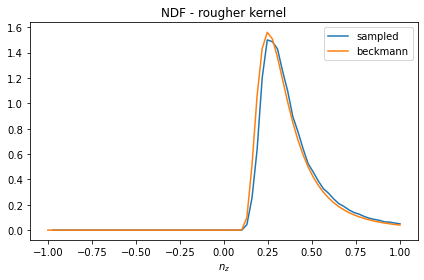

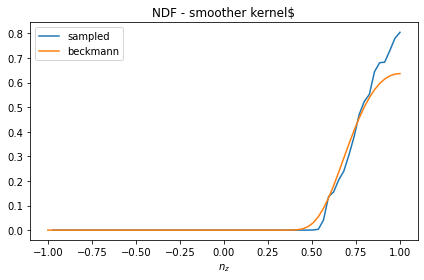

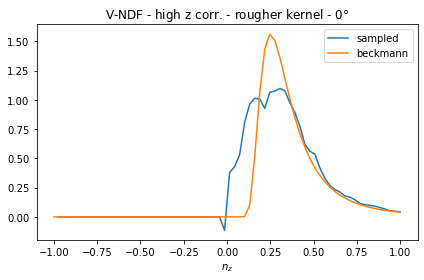

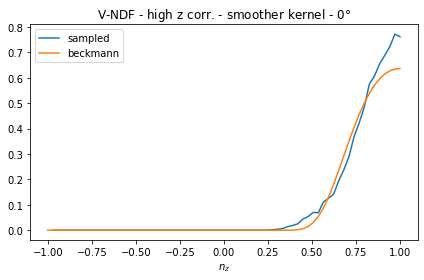

In [189]:
def beckmann(theta, alpha):
    u = np.cos(theta)
    return np.where(u > 0, np.exp(-(1/(u*u) - 1)/(alpha*alpha)) / (np.pi*alpha*alpha*np.power(u,4)), 0)

def plot_normal_collection(normals, label):
    #fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    fig, ax = plt.subplots()

    # define binning
    rbins = np.linspace(0, 1., 30)
    abins = np.linspace(0,2*np.pi, 30)

    #calculate histogram
    # hist, A, R = np.histogram2d(
    #     np.arctan2(normals[:,1], normals[:,0]), 
    #     np.sqrt(normals[:,0]**2 + normals[:,1]**2), bins=(30, 30), density=True)

    hist, A, R = np.histogram2d(
          normals[:,0], 
          normals[:,1], bins=(30, 30), density=True)

    #A, R = np.meshgrid(abins, rbins)
    pc = ax.pcolormesh(A, R, hist.T)
    fig.colorbar(pc)

    #ax.scatter(np.arctan2(normals[:,1], normals[:,0]), np.sqrt(normals[:,0]**2 + normals[:,1]**2), s=0.2, alpha=0.02, color="white")
    ax.set_ylim(-1,1)
    ax.set_xlim(-1,1)
    ax.set_facecolor("black")
    ax.grid(False)
    ax.set_yticks([])
    ax.set_title(label)
    #ax.xlabel("$n_x$")
    #ax.ylabel("$n_y$")
    ax.set_aspect("equal")
    fig.tight_layout()

def plot_normal_collection_1D(normals, label, beckmann_roughness=0):
    #fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    fig, ax = plt.subplots()

    # define binning
    rbins = np.linspace(-1, 1, 70)

    hist, bins = np.histogram(normals[:,2], bins=rbins, density=True)

    hist /= np.sin(bins[1:]) * np.pi * 2

    #bins = np.arccos(A)

    ax.plot(bins[1:], hist, label="sampled")

    if beckmann_roughness != 0:
        b = beckmann(np.arccos(bins), beckmann_roughness)

        #plt.plot(z, pdf, lw=1, alpha=0.6, label='vonmises pdf')
        plt.plot(bins, b, label='beckmann')

    #pc = ax.hist(normals[:,2], bins=rbins, density=True, histtype="step")

    #ax.set_xlim(-1,1)
    ax.grid(False)
    ax.set_title(label)
    #ax.set_yticks([])
    ax.set_xlabel("$n_z$")
    ax.legend()
    #ax.ylabel("$n_y$")
    #ax.set_theta_zero_location("N")
    #ax.set_aspect("equal")
    fig.tight_layout()
    

def br(L2):
    return np.sqrt(2*L2)


a = br(4)
normals = load_normal_reals("normals/squared-exponential-0.5/normals*.exr").reshape(-1,3)
plot_normal_collection_1D(normals, "NDF - rougher kernel", beckmann_roughness =  a)

a = br(0.25)
normals = load_normal_reals("normals/squared-exponential-2/normals*.exr").reshape(-1,3)
plot_normal_collection_1D(normals, "NDF - smoother kernel", beckmann_roughness = a)

a = br(4)
normals = np.reshape(np.fromfile('visible-normals/0-surface-rougher.bin', dtype=np.float32), (3,-1)).T
plot_normal_collection_1D(normals, "V-NDF - high z corr. - rougher kernel - $0\\degree$", beckmann_roughness =  a)
np.savetxt("normals-0-surface-rougher.csv", normals, delimiter=",")

a = br(0.25)
normals = np.reshape(np.fromfile('visible-normals/0-surface-smoother.bin', dtype=np.float32), (3,-1)).T
plot_normal_collection_1D(normals, "V-NDF - high z corr. - smoother kernel - $0\\degree$", beckmann_roughness =  a)
np.savetxt("normals-0-surface-smoother.csv", normals, delimiter=",")




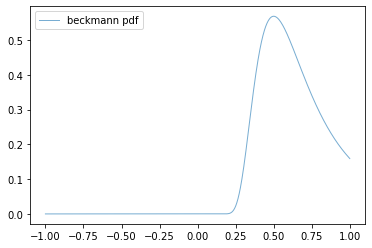

In [105]:

import scipy.stats as st



kappa = 10

u = np.linspace(-1, 1, 1000)
#pdf = st.vonmises.pdf(theta, kappa)

b = beckmann(np.arccos(u), 1.41421)

#z = np.cos(theta)
#pdf = pdf * np.sin(theta)


#plt.plot(z, pdf, lw=1, alpha=0.6, label='vonmises pdf')
plt.plot(u, b, lw=1, alpha=0.6, label='beckmann pdf')
plt.legend()